In [4]:
import numpy as np
import pandas as pd

crime_raw_data = pd.read_csv('./2020.csv', encoding='euc-kr')
crime_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      310 non-null    object
 1   죄종      310 non-null    object
 2   발생검거    310 non-null    object
 3   건수      310 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 9.8+ KB


In [5]:
crime_raw_data['죄종'].unique()

array(['살인', '강도', '강간,추행', '절도', '폭력', '강간'], dtype=object)

In [6]:
# 죄종에서 null 검출

crime_raw_data = crime_raw_data[crime_raw_data['죄종'].notnull()]
crime_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 309
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      310 non-null    object
 1   죄종      310 non-null    object
 2   발생검거    310 non-null    object
 3   건수      310 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 12.1+ KB


In [14]:
import pandas as pd

crime_station = crime_raw_data.pivot_table(
    crime_raw_data, index='구분', columns=['죄종','발생검거'], aggfunc=np.sum)

crime_station.head()

건수                                                                    \
죄종    강간      강간,추행           강도          살인            절도              폭력   
발생검거  검거  발생     검거     발생    검거    발생    검거    발생      검거      발생      검거   
구분                                                                           
강남   NaN NaN  433.0  513.0  10.0  12.0   3.0   5.0  1016.0  1941.0  1911.0   
강동   NaN NaN  167.0  188.0  14.0  15.0   3.0   3.0   781.0  1640.0  1697.0   
강북   NaN NaN  132.0  159.0   4.0   5.0   8.0   9.0   490.0   780.0  1625.0   
강서   NaN NaN  222.0  265.0   5.0   6.0   9.0  10.0  1070.0  1689.0  2087.0   
관악   NaN NaN  351.0  403.0   3.0   3.0  12.0  12.0  1137.0  2229.0  2355.0   

              
죄종            
발생검거      발생  
구분            
강남    2283.0  
강동    1942.0  
강북    1817.0  
강서    2445.0  
관악    2614.0

In [15]:
crime_station.columns

MultiIndex([('건수',    '강간', '검거'),
            ('건수',    '강간', '발생'),
            ('건수', '강간,추행', '검거'),
            ('건수', '강간,추행', '발생'),
            ('건수',    '강도', '검거'),
            ('건수',    '강도', '발생'),
            ('건수',    '살인', '검거'),
            ('건수',    '살인', '발생'),
            ('건수',    '절도', '검거'),
            ('건수',    '절도', '발생'),
            ('건수',    '폭력', '검거'),
            ('건수',    '폭력', '발생')],
           names=[None, '죄종', '발생검거'])

In [16]:
crime_station.columns = crime_station.columns.droplevel([0])
crime_station.columns

MultiIndex([(   '강간', '검거'),
            (   '강간', '발생'),
            ('강간,추행', '검거'),
            ('강간,추행', '발생'),
            (   '강도', '검거'),
            (   '강도', '발생'),
            (   '살인', '검거'),
            (   '살인', '발생'),
            (   '절도', '검거'),
            (   '절도', '발생'),
            (   '폭력', '검거'),
            (   '폭력', '발생')],
           names=['죄종', '발생검거'])

In [17]:
crime_station['강도','검거']

구분
강남     10.0
강동     14.0
강북      4.0
강서      5.0
관악      3.0
광진      4.0
구로      5.0
금천      6.0
남대문     2.0
노원      3.0
도봉      2.0
동대문     5.0
동작      2.0
마포      3.0
방배      1.0
서대문     1.0
서부      2.0
서초      3.0
성동      3.0
성북      2.0
송파     17.0
수서      1.0
양천      3.0
영등포     5.0
용산      6.0
은평      1.0
종로      4.0
종암      0.0
중랑      6.0
중부      4.0
혜화      3.0
Name: (강도, 검거), dtype: float64

In [18]:
crime_station['살인','발생']

구분
강남      5.0
강동      3.0
강북      9.0
강서     10.0
관악     12.0
광진      2.0
구로      6.0
금천      4.0
남대문     1.0
노원      4.0
도봉      0.0
동대문    10.0
동작      1.0
마포      9.0
방배      1.0
서대문     3.0
서부      3.0
서초      4.0
성동      5.0
성북      0.0
송파      6.0
수서      1.0
양천      5.0
영등포     7.0
용산      5.0
은평      1.0
종로      9.0
종암      4.0
중랑     10.0
중부      1.0
혜화      0.0
Name: (살인, 발생), dtype: float64

In [19]:
crime_station.head()

죄종    강간      강간,추행           강도          살인            절도              폭력  \
발생검거  검거  발생     검거     발생    검거    발생    검거    발생      검거      발생      검거   
구분                                                                           
강남   NaN NaN  433.0  513.0  10.0  12.0   3.0   5.0  1016.0  1941.0  1911.0   
강동   NaN NaN  167.0  188.0  14.0  15.0   3.0   3.0   781.0  1640.0  1697.0   
강북   NaN NaN  132.0  159.0   4.0   5.0   8.0   9.0   490.0   780.0  1625.0   
강서   NaN NaN  222.0  265.0   5.0   6.0   9.0  10.0  1070.0  1689.0  2087.0   
관악   NaN NaN  351.0  403.0   3.0   3.0  12.0  12.0  1137.0  2229.0  2355.0   

죄종            
발생검거      발생  
구분            
강남    2283.0  
강동    1942.0  
강북    1817.0  
강서    2445.0  
관악    2614.0

In [20]:
tmp = crime_station.columns.get_level_values(0) + \
        crime_station.columns.get_level_values(1)

tmp

Index(['강간검거', '강간발생', '강간,추행검거', '강간,추행발생', '강도검거', '강도발생', '살인검거', '살인발생',
       '절도검거', '절도발생', '폭력검거', '폭력발생'],
      dtype='object')

In [21]:
crime_station.columns = tmp
crime_station.head()

,강간검거,강간발생,"강간,추행검거","강간,추행발생",강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구분,,,,,,,,,,,,
강남,NaN,NaN,433.0,513.0,10.0,12.0,3.0,5.0,1016.0,1941.0,1911.0,2283.0
강동,NaN,NaN,167.0,188.0,14.0,15.0,3.0,3.0,781.0,1640.0,1697.0,1942.0
강북,NaN,NaN,132.0,159.0,4.0,5.0,8.0,9.0,490.0,780.0,1625.0,1817.0
강서,NaN,NaN,222.0,265.0,5.0,6.0,9.0,10.0,1070.0,1689.0,2087.0,2445.0
관악,NaN,NaN,351.0,403.0,3.0,3.0,12.0,12.0,1137.0,2229.0,2355.0,2614.0


In [22]:
crime_station.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 강남 to 혜화
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   강간검거     5 non-null      float64
 1   강간발생     5 non-null      float64
 2   강간,추행검거  26 non-null     float64
 3   강간,추행발생  26 non-null     float64
 4   강도검거     31 non-null     float64
 5   강도발생     31 non-null     float64
 6   살인검거     31 non-null     float64
 7   살인발생     31 non-null     float64
 8   절도검거     31 non-null     float64
 9   절도발생     31 non-null     float64
 10  폭력검거     31 non-null     float64
 11  폭력발생     31 non-null     float64
dtypes: float64(12)
memory usage: 4.2+ KB


In [24]:
real_gu = {'종로구' : ['종로', '혜화'],
          '중구' : ['남대문', '중부'],
          '용산구' : ['광진'],
          '성동구': ['성동'],
          '광진구' : ['광진'],
          '동대문구' : ['동대문'],
          '중랑구' : ['중랑'],
          '성북구' : ['성북', '종암'],
          '강북구' : ['강북'],
          '도봉구' : ['도봉'],
          '노원구' : ['노원'],
          '은평구' : ['서부', '은평'],
          '서대문구' : ['서대문'],
          '마포구' : ['마포'],
          '양천구' : ['양천'],
          '강서구' : ['강서'],
          '구로구' : ['구로'],
          '금천구' : ['금천'],
          '영등포구' : ['영등포'],
          '동작구' : ['동작'],
          '관악구' : ['관악'],
          '서초구' : ['방배', '서초'],
          '강남구' : ['강남', '수서'],
          '송파구' : ['송파'],
          '강동구' : ['강동']}

In [26]:
tmp_gu = []

for station in crime_station.index:
    for gu_name, station_name in real_gu.items():
        if station in station_name:
            tmp_gu.append(gu_name)

tmp_gu

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '용산구',
 '광진구',
 '구로구',
 '금천구',
 '중구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서초구',
 '서대문구',
 '은평구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '강남구',
 '양천구',
 '영등포구',
 '은평구',
 '종로구',
 '성북구',
 '중랑구',
 '중구',
 '종로구']

In [27]:
crime_station['구'] = tmp_gu
crime_station

,강간검거,강간발생,"강간,추행검거","강간,추행발생",강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,구
구분,,,,,,,,,,,,,
강남,NaN,NaN,433.0,513.0,10.0,12.0,3.0,5.0,1016.0,1941.0,1911.0,2283.0,강남구
강동,NaN,NaN,167.0,188.0,14.0,15.0,3.0,3.0,781.0,1640.0,1697.0,1942.0,강동구
강북,NaN,NaN,132.0,159.0,4.0,5.0,8.0,9.0,490.0,780.0,1625.0,1817.0,강북구
강서,NaN,NaN,222.0,265.0,5.0,6.0,9.0,10.0,1070.0,1689.0,2087.0,2445.0,강서구
관악,NaN,NaN,351.0,403.0,3.0,3.0,12.0,12.0,1137.0,2229.0,2355.0,2614.0,관악구
광진,NaN,NaN,224.0,255.0,4.0,4.0,2.0,2.0,874.0,1664.0,1407.0,1676.0,용산구
구로,NaN,NaN,142.0,197.0,5.0,5.0,6.0,6.0,1008.0,1763.0,1823.0,2204.0,광진구
금천,NaN,NaN,93.0,117.0,6.0,7.0,4.0,4.0,553.0,999.0,1310.0,1471.0,구로구
남대문,NaN,NaN,52.0,73.0,2.0,2.0,1.0,1.0,368.0,699.0,494.0,579.0,금천구


In [28]:
crime_gu = pd.pivot_table(crime_station, index='구', aggfunc=np.sum)

crime_gu.head()

,"강간,추행검거","강간,추행발생",강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구,,,,,,,,,,,,
강남구,433.0,513.0,90.0,109.0,13.0,15.0,8.0,10.0,1734.0,3458.0,3181.0,3865.0
강동구,167.0,188.0,0.0,0.0,14.0,15.0,3.0,3.0,781.0,1640.0,1697.0,1942.0
강북구,132.0,159.0,0.0,0.0,4.0,5.0,8.0,9.0,490.0,780.0,1625.0,1817.0
강서구,222.0,265.0,0.0,0.0,5.0,6.0,9.0,10.0,1070.0,1689.0,2087.0,2445.0
관악구,351.0,403.0,0.0,0.0,3.0,3.0,12.0,12.0,1137.0,2229.0,2355.0,2614.0


In [31]:
target = ['강간,추행검거율','강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
num = ['강간,추행검거','강간검거','강도검거','살인검거','절도검거','폭력검거']
den = ['강간,추행발생','강간발생','강도발생','살인발생','절도발생','폭력발생']

crime_gu[target] = crime_gu[num].div(crime_gu[den].values)*100
crime_gu.head()

,"강간,추행검거","강간,추행발생",강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,"강간,추행검거율",강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,,,,,,,,,
강남구,433.0,513.0,90.0,109.0,13.0,15.0,8.0,10.0,1734.0,3458.0,3181.0,3865.0,84.405458,82.568807,86.666667,80.000000,50.144592,82.302717
강동구,167.0,188.0,0.0,0.0,14.0,15.0,3.0,3.0,781.0,1640.0,1697.0,1942.0,88.829787,NaN,93.333333,100.000000,47.621951,87.384140
강북구,132.0,159.0,0.0,0.0,4.0,5.0,8.0,9.0,490.0,780.0,1625.0,1817.0,83.018868,NaN,80.000000,88.888889,62.820513,89.433132
강서구,222.0,265.0,0.0,0.0,5.0,6.0,9.0,10.0,1070.0,1689.0,2087.0,2445.0,83.773585,NaN,83.333333,90.000000,63.351095,85.357873
관악구,351.0,403.0,0.0,0.0,3.0,3.0,12.0,12.0,1137.0,2229.0,2355.0,2614.0,87.096774,NaN,100.000000,100.000000,51.009421,90.091813


In [32]:
crime_gu = crime_gu.drop(columns=num)
crime_gu.head()

,"강간,추행발생",강간발생,강도발생,살인발생,절도발생,폭력발생,"강간,추행검거율",강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,,,
강남구,513.0,109.0,15.0,10.0,3458.0,3865.0,84.405458,82.568807,86.666667,80.000000,50.144592,82.302717
강동구,188.0,0.0,15.0,3.0,1640.0,1942.0,88.829787,NaN,93.333333,100.000000,47.621951,87.384140
강북구,159.0,0.0,5.0,9.0,780.0,1817.0,83.018868,NaN,80.000000,88.888889,62.820513,89.433132
강서구,265.0,0.0,6.0,10.0,1689.0,2445.0,83.773585,NaN,83.333333,90.000000,63.351095,85.357873
관악구,403.0,0.0,3.0,12.0,2229.0,2614.0,87.096774,NaN,100.000000,100.000000,51.009421,90.091813


In [35]:
crime_gu[crime_gu[target] > 100] = 100
crime_gu

,"강간,추행발생",강간발생,강도발생,살인발생,절도발생,폭력발생,"강간,추행검거율",강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,,,
강남구,513.0,109.0,15.0,10.0,3458.0,3865.0,84.405458,82.568807,86.666667,80.000000,50.144592,82.302717
강동구,188.0,0.0,15.0,3.0,1640.0,1942.0,88.829787,NaN,93.333333,100.000000,47.621951,87.384140
강북구,159.0,0.0,5.0,9.0,780.0,1817.0,83.018868,NaN,80.000000,88.888889,62.820513,89.433132
강서구,265.0,0.0,6.0,10.0,1689.0,2445.0,83.773585,NaN,83.333333,90.000000,63.351095,85.357873
관악구,403.0,0.0,3.0,12.0,2229.0,2614.0,87.096774,NaN,100.000000,100.000000,51.009421,90.091813
광진구,197.0,0.0,5.0,6.0,1763.0,2204.0,72.081218,NaN,100.000000,100.000000,57.175269,82.713249
구로구,117.0,0.0,7.0,4.0,999.0,1471.0,79.487179,NaN,85.714286,100.000000,55.355355,89.055065
금천구,73.0,0.0,2.0,1.0,699.0,579.0,71.232877,NaN,100.000000,100.000000,52.646638,85.319516
노원구,0.0,82.0,2.0,0.0,861.0,1234.0,NaN,100.000000,100.000000,NaN,44.018583,82.820097


In [36]:
crime_gu.rename(columns={'강간,추행발생' : '강간,추행',
                        '강간발생' : '강간',
                        '강도발생' : '강도',
                        '살인발생' : '살인',
                        '절도발생' : '절도',
                        '폭력발생' : '폭력'},
               inplace = True)

crime_gu.head()

,"강간,추행",강간,강도,살인,절도,폭력,"강간,추행검거율",강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,,,
강남구,513.0,109.0,15.0,10.0,3458.0,3865.0,84.405458,82.568807,86.666667,80.000000,50.144592,82.302717
강동구,188.0,0.0,15.0,3.0,1640.0,1942.0,88.829787,NaN,93.333333,100.000000,47.621951,87.384140
강북구,159.0,0.0,5.0,9.0,780.0,1817.0,83.018868,NaN,80.000000,88.888889,62.820513,89.433132
강서구,265.0,0.0,6.0,10.0,1689.0,2445.0,83.773585,NaN,83.333333,90.000000,63.351095,85.357873
관악구,403.0,0.0,3.0,12.0,2229.0,2614.0,87.096774,NaN,100.000000,100.000000,51.009421,90.091813


In [37]:
col = ['강간,추행', '강간', '강도', '살인', '절도', '폭력']
crime_gu_norm = crime_gu[col] / crime_gu[col].max()
crime_gu_norm.head()

,"강간,추행",강간,강도,살인,절도,폭력
구,,,,,,
강남구,1.000000,1.0,1.000000,0.833333,1.000000,1.000000
강동구,0.366472,0.0,1.000000,0.250000,0.474263,0.502458
강북구,0.309942,0.0,0.333333,0.750000,0.225564,0.470116
강서구,0.516569,0.0,0.400000,0.833333,0.488433,0.632600
관악구,0.785575,0.0,0.200000,1.000000,0.644592,0.676326


In [38]:
col2 = ['강간,추행검거율', '강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
crime_gu_norm[col2] = crime_gu[col2]
crime_gu_norm.head()

,"강간,추행",강간,강도,살인,절도,폭력,"강간,추행검거율",강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,,,
강남구,1.000000,1.0,1.000000,0.833333,1.000000,1.000000,84.405458,82.568807,86.666667,80.000000,50.144592,82.302717
강동구,0.366472,0.0,1.000000,0.250000,0.474263,0.502458,88.829787,NaN,93.333333,100.000000,47.621951,87.384140
강북구,0.309942,0.0,0.333333,0.750000,0.225564,0.470116,83.018868,NaN,80.000000,88.888889,62.820513,89.433132
강서구,0.516569,0.0,0.400000,0.833333,0.488433,0.632600,83.773585,NaN,83.333333,90.000000,63.351095,85.357873
관악구,0.785575,0.0,0.200000,1.000000,0.644592,0.676326,87.096774,NaN,100.000000,100.000000,51.009421,90.091813


In [39]:
col = ['강간,추행', '강간', '강도', '살인', '절도', '폭력']
crime_gu_norm['범죄'] = np.mean(crime_gu_norm[col], axis=1)
crime_gu_norm.head()

,"강간,추행",강간,강도,살인,절도,폭력,"강간,추행검거율",강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,범죄
구,,,,,,,,,,,,,
강남구,1.000000,1.0,1.000000,0.833333,1.000000,1.000000,84.405458,82.568807,86.666667,80.000000,50.144592,82.302717,0.972222
강동구,0.366472,0.0,1.000000,0.250000,0.474263,0.502458,88.829787,NaN,93.333333,100.000000,47.621951,87.384140,0.432199
강북구,0.309942,0.0,0.333333,0.750000,0.225564,0.470116,83.018868,NaN,80.000000,88.888889,62.820513,89.433132,0.348159
강서구,0.516569,0.0,0.400000,0.833333,0.488433,0.632600,83.773585,NaN,83.333333,90.000000,63.351095,85.357873,0.478489
관악구,0.785575,0.0,0.200000,1.000000,0.644592,0.676326,87.096774,NaN,100.000000,100.000000,51.009421,90.091813,0.551082


In [40]:
crime_gu_norm['범죄'].sort_values(ascending=False).head()

구
강남구    0.972222
성북구    0.751122
관악구    0.551082
은평구    0.518787
양천구    0.488157
Name: 범죄, dtype: float64

In [42]:
col = ['강간,추행검거율', '강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
crime_gu_norm['검거'] = np.mean(crime_gu_norm[col], axis=1)
crime_gu_norm.head()

,"강간,추행",강간,강도,살인,절도,폭력,"강간,추행검거율",강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,범죄,검거
구,,,,,,,,,,,,,,
강남구,1.000000,1.0,1.000000,0.833333,1.000000,1.000000,84.405458,82.568807,86.666667,80.000000,50.144592,82.302717,0.972222,77.681374
강동구,0.366472,0.0,1.000000,0.250000,0.474263,0.502458,88.829787,NaN,93.333333,100.000000,47.621951,87.384140,0.432199,83.433842
강북구,0.309942,0.0,0.333333,0.750000,0.225564,0.470116,83.018868,NaN,80.000000,88.888889,62.820513,89.433132,0.348159,80.832280
강서구,0.516569,0.0,0.400000,0.833333,0.488433,0.632600,83.773585,NaN,83.333333,90.000000,63.351095,85.357873,0.478489,81.163177
관악구,0.785575,0.0,0.200000,1.000000,0.644592,0.676326,87.096774,NaN,100.000000,100.000000,51.009421,90.091813,0.551082,85.639602


In [43]:
crime_gu_norm['검거'].sort_values(ascending=False).head()

구
관악구    85.639602
용산구    84.863411
성북구    84.282874
중랑구    83.579844
강동구    83.433842
Name: 검거, dtype: float64

In [45]:
crime_gu_norm['검거'].sort_values().head()

구
양천구     68.778252
영등포구    74.199985
은평구     75.131943
종로구     75.182413
동작구     75.316346
Name: 검거, dtype: float64

/Users/gahi/.pyenv/versions/dlex/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.draw()
/Users/gahi/.pyenv/versions/dlex/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.draw()
/Users/gahi/.pyenv/versions/dlex/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 52628 (\N{HANGUL SYLLABLE CU}) missing from current font.
  fig.canvas.draw()
/Users/gahi/.pyenv/versions/dlex/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from current font.
  fig.canvas.draw()
/Users/gahi/.pyenv/versions/dlex/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 44160 (\N{HANGUL SYLLABLE GEOM}) missing from current font.
  fig.canvas.draw()
/Users/gahi/.pyenv/versions/dlex/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Gl

/Users/gahi/.pyenv/versions/dlex/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48276 (\N{HANGUL SYLLABLE BEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gahi/.pyenv/versions/dlex/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51396 (\N{HANGUL SYLLABLE JOE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gahi/.pyenv/versions/dlex/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44160 (\N{HANGUL SYLLABLE GEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gahi/.pyenv/versions/dlex/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gahi/.pyenv/versions/dlex/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) mis

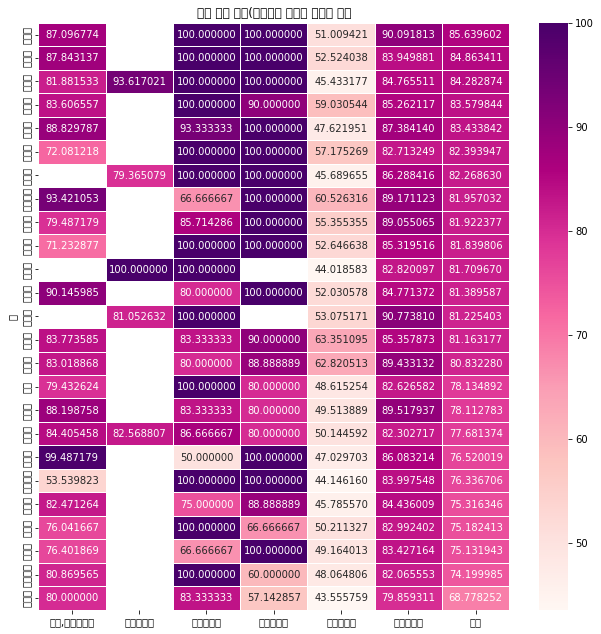

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

target_col = ['강간,추행검거율', '강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율', '검거']

crime_gu_norm_sort = crime_gu_norm.sort_values(by='검거', ascending=False)

plt.figure(figsize = (10, 10))
sns.heatmap(crime_gu_norm_sort[target_col],
           annot=True, fmt='f', linewidths=.5, cmap='RdPu')
plt.title('범죄 검거 비율(정규화된 검거의 합으로 정렬')
plt.autoscale()
plt.tight_layout(pad=5)
plt.show()